<a href="https://colab.research.google.com/github/lwehausen/Python/blob/main/NYCflights13_data_analysis_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A data analysis and data visualization using the flights, airlines, and airports data frames and planes table in the nycflights13 package.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
flights = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/flights.csv")

In [29]:
airlines = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/airlines.csv")

In [30]:
airports = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/airports.csv")

In [31]:
planes = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/planes.csv")

What month had the highest proportion of cancelled
flights? What month had the lowest? Interpret any seasonal patterns.

In [ ]:
prop = pd.DataFrame(flights.groupby("month")["month"].count())
prop.columns = ["count"] # Renaming column name to count of flights
sum = prop.sum() # Total number of flights
prop["proportion"] = prop.apply(lambda count: 100*count/float(count.sum())) # percentage flights / total
prop

,count,proportion
month,,
1,27004,8.018386
2,24951,7.408782
3,28834,8.561774
4,28330,8.412120
5,28796,8.550491
6,28243,8.386286
7,29425,8.737262
8,29327,8.708162
9,27574,8.187638


Since this gives the proportion of flights that were not canceled, look for the months with the lowest values for months with the highest proportion of canceled flights. Now we can see that February had the most cancellations and October had the least cancellations.

Given that a delay is longer than an hour, what is the
average time of the total delay by airport (i.e. origin)

Average arrival delay of flights, by airport:

In [ ]:
by_airport = flights.groupby(["origin"])
by_airport.arr_delay.mean()

origin
EWR    9.107055
JFK    5.551481
LGA    5.783488
Name: arr_delay, dtype: float64

Average departure delay of flights, by airport:

In [ ]:
by_airport2 = flights.groupby(["origin"])
by_airport2.dep_delay.mean()

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64

In [ ]:
#create second new df that also filters on dep_delay for >= 60 minutes; then groupby carrier and count total number of flights for each carrier
myflights4 = flights[flights["dep_delay"] >= 60]
myflights4 = myflights4.groupby("carrier")["carrier"].count()
numflights = pd.DataFrame(myflights4)
sum = numflights.sum()

#rename columns
numflights.columns = ["count"]
numflights.reset_index(inplace=True)
numflights = numflights.rename(columns = {"index":"carrier"})

#sort number of flights and obtain the 5 carriers with the most flights, for flights with delays >= 60
numflights.sort_values(["count"], inplace=True, ascending=False)
numflights = numflights.head(5)

What is the average air time for all flights by carrier?
Which carrier has the longest average air time on their flights?

In [ ]:
avg_time = flights[["carrier", "air_time"]]
#Drop NaNs
avg_time = avg_time.dropna(axis="rows")
#Groupby carrier then take the mean of air_time
avg_time = avg_time.groupby("carrier")["air_time"].mean()
avg_time = pd.DataFrame(avg_time)
avg_time.columns = ["mean"]
#Sort average air_time values, by carrier, from greatest to least amount of time:
avg_time.sort_values(["mean"], inplace = True, ascending = False )
#Show the carrier with the longest average air time on their flights:
avg_time.head(1)

,mean
carrier,
HA,623.087719


HA had the longest average air time.

Keeping only flights that had a delay greater than 0,
create a histogram for each month of the delay data.

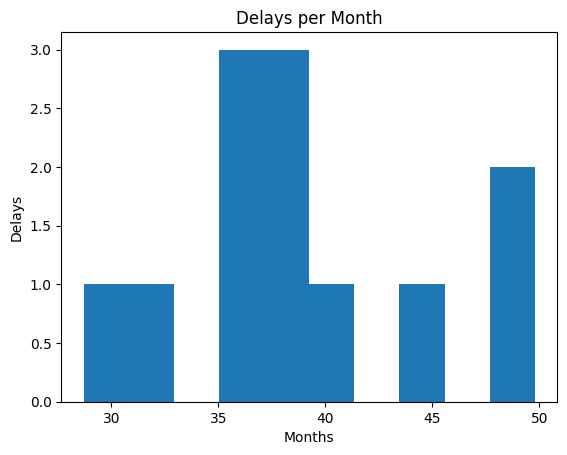

In [ ]:
myflights = flights[flights["dep_delay"] > 0]
delay_month = pd.DataFrame(myflights)

plt.hist(delay_month.groupby("month")["dep_delay"].mean())
plt.xlabel("Months")
plt.ylabel("Delays")
plt.title("Delays per Month")
plt.show()

Create side-by-side boxplots of delay times for flights with
delays of 60 minutes or greater, for the top 5 airlines, in terms of number
of flights.

<Axes: xlabel='carrier', ylabel='dep_delay'>

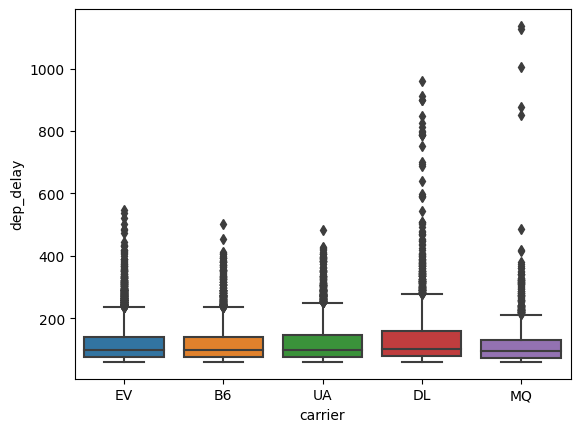

In [ ]:
#create new dataframe that filters on dep_delay for >= 60 minutes; keep only carrier and dep_delay
myflights3 = flights[flights["dep_delay"] >= 60]
myflights3 = myflights3[["carrier", "dep_delay"]]

#create second new df that also filters on dep_delay for >= 60 minutes; then groupby carrier and count total number of flights for each carrier
myflights4 = flights[flights["dep_delay"] >= 60]
myflights4 = myflights4.groupby("carrier")["carrier"].count()
numflights = pd.DataFrame(myflights4)
sum = numflights.sum()

#rename columns
numflights.columns = ['count']
numflights.reset_index(inplace=True)
numflights = numflights.rename(columns = {'index':'carrier'})

#sort number of flights and obtain the 5 carriers with the most flights, for flights with delays >= 60
numflights.sort_values(['count'], inplace=True, ascending=False)
numflights = numflights.head(5)

#merge the two dataframes together on carrier
inner_merged = pd.merge(myflights3, numflights, on = ["carrier"], how = "right")

#make a boxplot of the top 5 carriers by number of flights for departure delays >= 60 minutes:
sns.boxplot(data=inner_merged, x="carrier", y = "dep_delay")

What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013?

In [34]:
#Group flights by origin
flights2 = flights[["year", "origin", "tailnum"]]

#First rename year variable from flights2. Then merge flights2 with planes to get year of manufacture from tailnum and create a new variable that is age of the plane year: 2013-year = age.
flights2.columns = ["year2", "origin", "tailnum"]

#Take only information that is cared about from planes and make new df
planes2 = planes[["year", "tailnum"]]

merg4 = pd.merge(planes2, flights2, on = "tailnum", how="inner")
merg4["plane_age"] = merg4["year2"] - merg4["year"]
merg4 = merg4.drop_duplicates()
merg4 = merg4.loc[:,["origin", "tailnum", "plane_age"]].sort_values(["plane_age"], ascending = [False])
merg4.head(1)

,origin,tailnum,plane_age
119783,JFK,N381AA,57.0


The oldest plane, identified by tail number, is plane N381AA, with age of 57 years old.

How many airplanes that flew from New York City are
included in the planes table?

In [36]:
#Remove every flight that did not originate at a NYC airport
flights3 = flights[(flights.origin == "JFK") & (flights.origin =="LGA") & (flights.origin == "EWR")]

#Create a count of every flight by tailnum
flights3 = pd.DataFrame(flights[["tailnum"]].groupby("tailnum")["tailnum"].count())
flights3.columns = ["count"]
sum = flights3.sum()
flights3

#Merge flights3 with planes by tailnum to have count of how many planes are in both dfs
merg5 = pd.merge(planes, flights3, on = "tailnum", how = "inner")
merg5 = merg5.loc[:,["tailnum","count"]]
len(merg5.index)

3322

There are 3322 observations, so 3322 planes are similar between planes df and planes that flew out of a NY airport from flights dataframe.